In [10]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

from pathlib import Path
from tqdm import tqdm

import numpy as np
import os.path as op
import os
import cv2

2.4.1


In [2]:
class_names = ['dog', 'rooster', 'pig', 'cow', 'frog',
          'cat', 'hen', 'insects', 'sheep', 'crow',
          'rain', 'sea_waves', 'crackling_fire', 'crickets', 'chirping_birds',
          'water_drops', 'wind', 'pouring_water', 'toilet_flush', 'thunderstorm',
          'crying_baby', 'sneezing', 'clapping', 'breathing', 'coughing',
          'footsteps', 'laughing', 'brushing_teeth', 'snoring', 'drinking_sipping',
          'door_wood_knock', 'mouse_click', 'keyboard_typing', 'door_wood_creaks', 'can_opening',
          'washing_machine', 'vacuum_cleaner', 'clock_alarm', 'clock_tick', 'glass_breaking',
          'helicopter', 'chainsaw', 'siren', 'car_horn', 'engine',
          'train', 'church_bells', 'airplane', 'fireworks', 'hand_saw']

In [45]:
audio_pth = '/tmp2/paulolbear/dataset/ESC-50-master/audio_15seg'
spec_pth = '/tmp2/paulolbear/dataset/ESC-50-master/spectrogram_15seg'
validation_split = 0.1

In [3]:
def show_img(img):
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [3]:
### Audio preprocess
train_name = []
train_specs = []
train_labels = []

test_name = []
test_specs = []
test_labels = []

n_data = len(os.listdir(spec_pth)) - 1
print(f'There are {n_data} files.')

for i, filename in tqdm(enumerate(Path(spec_pth).glob('*.npy'))):
    #print(filename)
    data_name = str(filename)
    data = np.load(filename)
    #print(data.shape)
    w, h, _ = data.shape
    data = data.reshape(w, h)
    #print(data.shape)
    #print(data, data.max(), data.min())
    
    class_name = int(op.basename(filename).split('-')[-1].split('_')[0])
    #print(data_name, class_name)
    
    if i < n_data * validation_split:
        test_name.append(data_name)
        test_specs.append(data)
        test_labels.append(class_name)
    else:
        train_name.append(data_name)
        train_specs.append(data)
        train_labels.append(class_name)
train_specs = np.array(train_specs)
test_specs = np.array(test_specs)

4it [00:00, 36.48it/s]

There are 6000 files.


6000it [00:49, 122.35it/s] 


In [4]:
# save as txt file
training_file = './data/train_list.txt'
testing_file = './data/test_list.txt'

'''
length = len(train_name)
with open(training_file, 'w') as f:
    for i in range(length):
        f.write(str(train_name[i]) + ' ' + str(train_labels[i]) +'\n')
        
length = len(test_name)
with open(testing_file, 'w') as f:
    for i in range(length):
        f.write(str(test_name[i]) + ' ' + str(test_labels[i]) +'\n')
'''

"\nlength = len(train_name)\nwith open(training_file, 'w') as f:\n    for i in range(length):\n        f.write(str(train_name[i]) + ' ' + str(train_labels[i]) +'\n')\n        \nlength = len(test_name)\nwith open(testing_file, 'w') as f:\n    for i in range(length):\n        f.write(str(test_name[i]) + ' ' + str(test_labels[i]) +'\n')\n"

In [5]:
def load_data_filename(filename, batch=False):
    datas = []
    labels = []
    with open(filename, 'r') as f:
        data_list = f.read().splitlines()
        for line in data_list:
            #datas.append(line.split(' ')[0])
            data_name = line.split(' ')[0]
            data = np.load(data_name)
            if batch is False:
                w, h, _ = data.shape
                data = data.reshape(w, h)
            datas.append(data)

            labels.append(int(line.split(' ')[1]))
    return np.array(datas), np.array(labels)

In [6]:
train_specs, train_labels = load_data_filename(training_file)

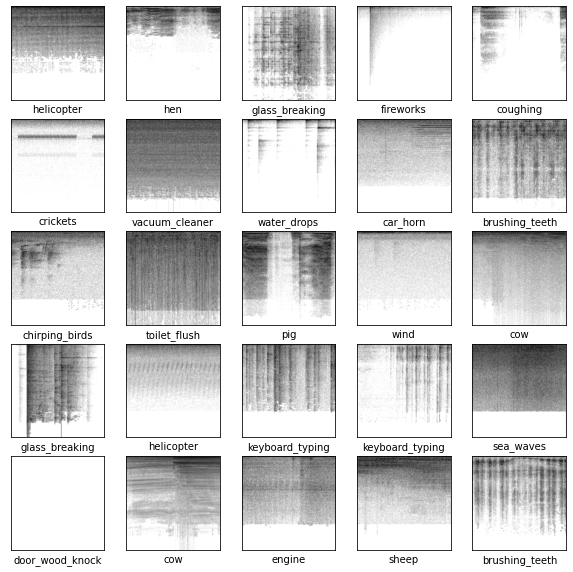

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_specs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [61]:
# OTSU threshold
n_data = len(os.listdir(spec_pth))
print(f'There are {n_data} files.')
for i, filename in tqdm(enumerate(Path(spec_pth).glob('*.npy'))):
    #print(filename)
    filename = str(filename)
    basename = op.basename(filename)
    
    data = np.load(filename)
    w, h, _ = data.shape
    data = data.reshape(w, h)
    #show_img(data)
    
    data_255 = data * 255
    data_255 = np.around(data_255)
    data_255 = data_255.astype(np.uint8)
    ret, th = cv2.threshold(data_255, 0, 1, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #show_img(th)
    th_name = op.join(op.dirname(filename)+'_thOTSU', basename.split('.')[0])
    #print(th_name)
    
    th = th[:, :, np.newaxis]
    np.save(th_name, th)

14it [00:00, 137.26it/s]

There are 6001 files.


6000it [00:20, 293.34it/s] 


In [63]:
th_specs = []
th_labels = []

spec_th_pth = '/tmp2/paulolbear/dataset/ESC-50-master/spectrogram_15seg_thOTSU'
for i, filename in tqdm(enumerate(Path(spec_th_pth).glob('*.npy'))):
    data_name = str(filename)
    data = np.load(filename)
    #print(data.shape)
    w, h, _ = data.shape
    data = data.reshape(w, h)
    class_name = int(op.basename(filename).split('-')[-1].split('_')[0])
    
    th_specs.append(data)
    th_labels.append(class_name)

6000it [00:03, 1664.62it/s]


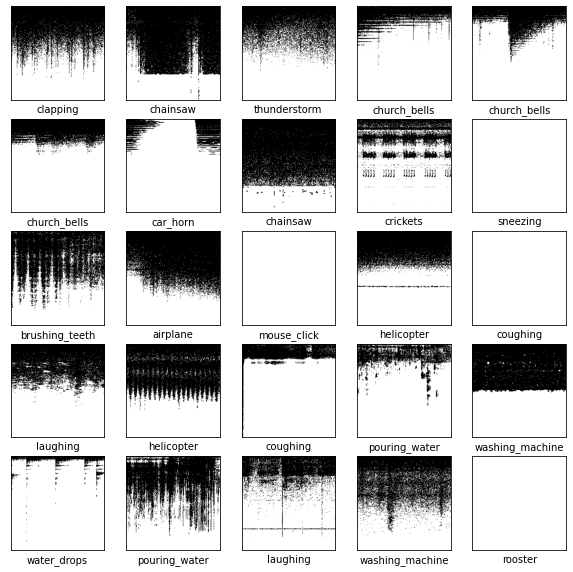

In [64]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(th_specs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[th_labels[i]])
plt.show()